In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import os
from pandas.plotting import autocorrelation_plot


import warnings
import itertools

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import scipy.integrate as integrate
import scipy.special as special

In [20]:
wages_path = 'wages.xlsx'

wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW','VIC','QLD','SA','WA','TAS','NT'])
wages = pd.DataFrame(wages)
wages = wages.set_index('time').asfreq('QS-DEC')

# Read the Excel file into a pandas DataFrame
wages_pre_covid =wages.iloc[:40]


In [21]:
wages_nsw = wages['NSW']
wages_vic = wages['VIC']
wages_qld = wages['QLD']
wages_sa = wages['SA']
wages_wa = wages['WA']
wages_tas = wages['TAS']
wages_nt = wages['NT']

<Axes: xlabel='time'>

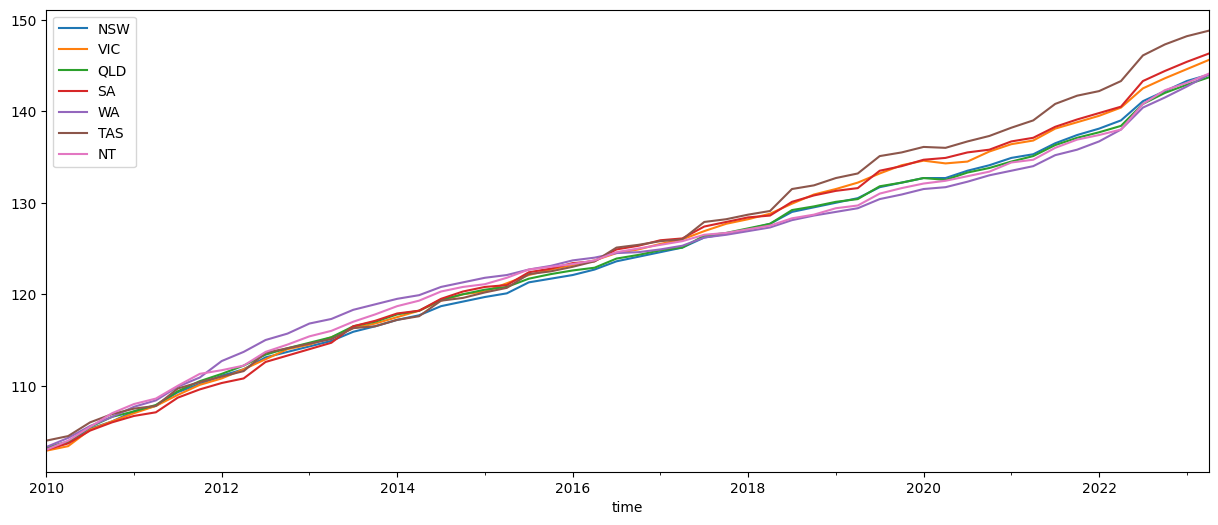

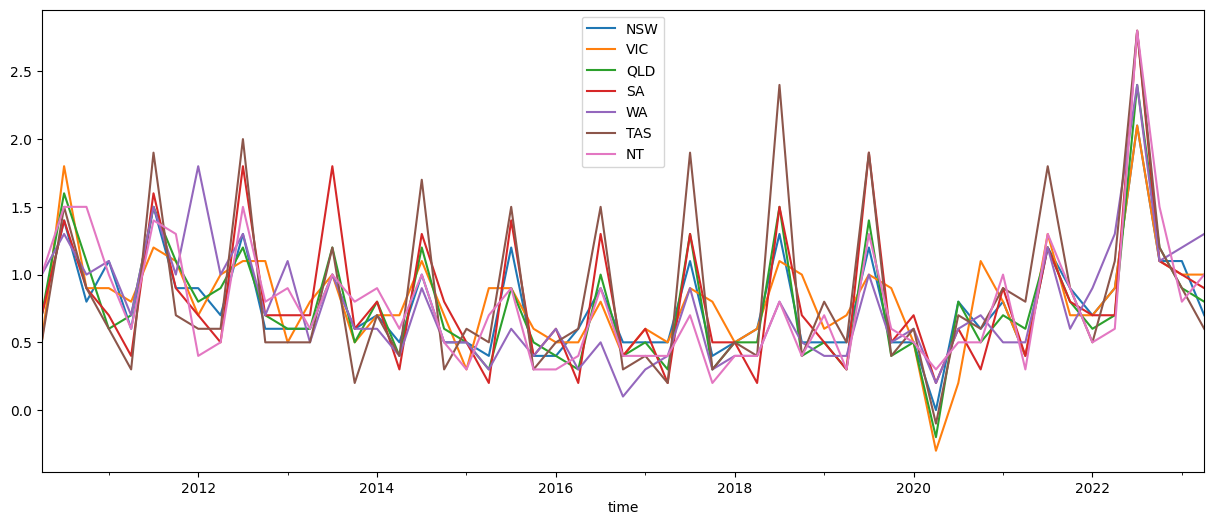

In [22]:
wages.plot(figsize=(15, 6))
wages_change = wages.diff().dropna()
wages_change.plot(figsize=(15, 6))

In [23]:
wages_pre_covid_nsw = wages_pre_covid['NSW']
wages_pre_covid_vic = wages_pre_covid['VIC']
wages_pre_covid_qld = wages_pre_covid['QLD']
wages_pre_covid_sa = wages_pre_covid['SA']
wages_pre_covid_wa = wages_pre_covid['WA']
wages_pre_covid_tas = wages_pre_covid['TAS']
wages_pre_covid_nt = wages_pre_covid['NT']

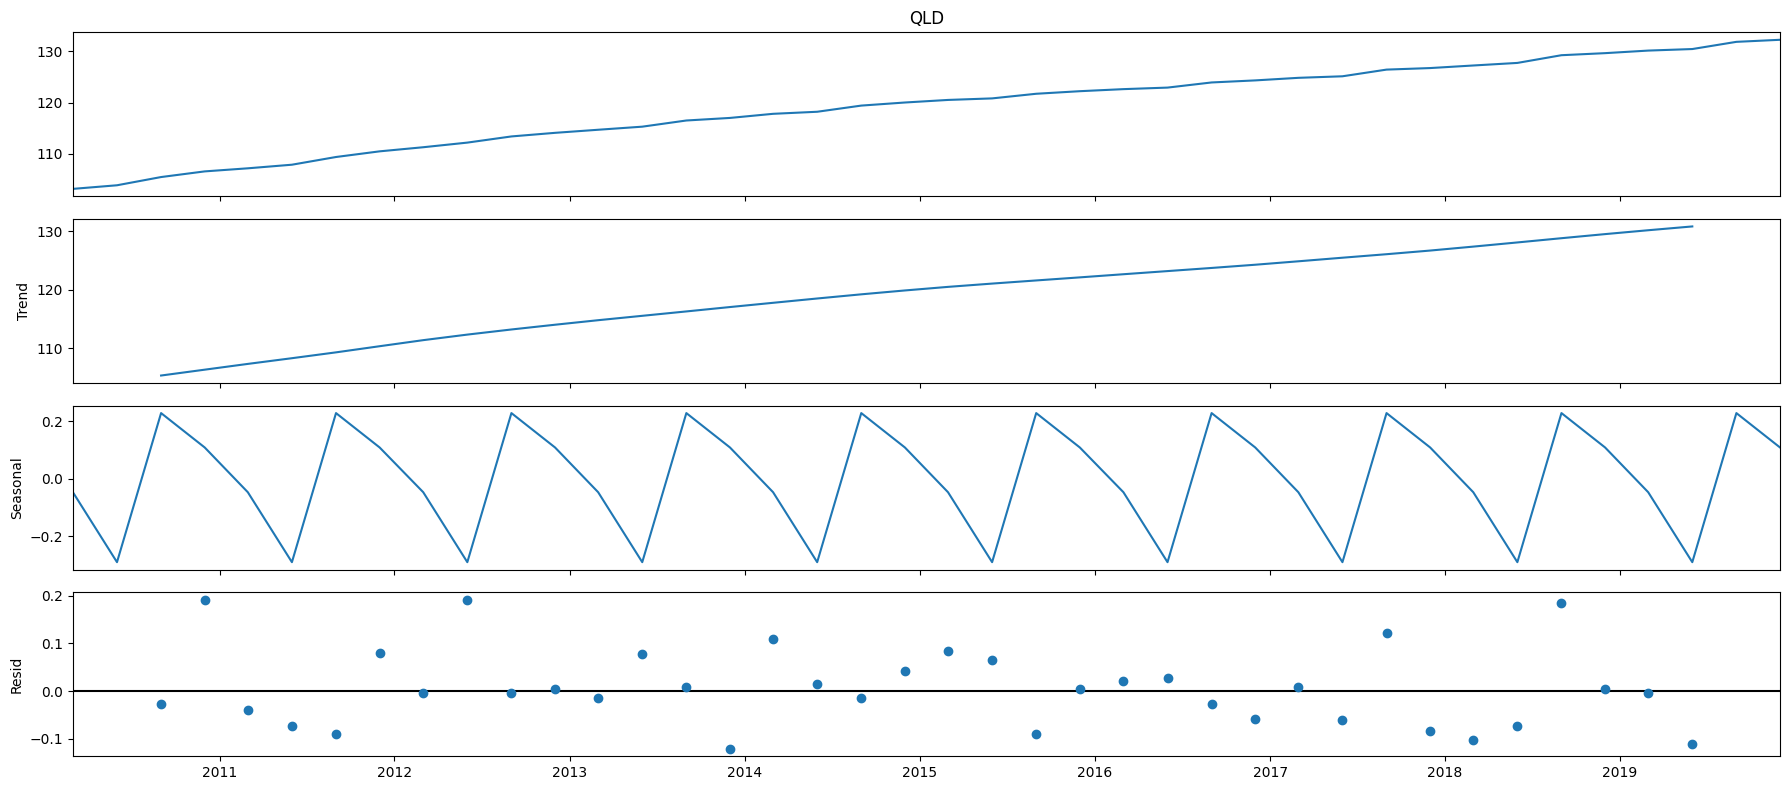

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(wages_pre_covid_qld, model='additive')
decomposition.plot()
plt.show()

Time series forecasting with ARIMA


In [25]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_qld)

ADF Test Statistic : -0.21210169860935893
p-value : 0.937063669885278
#Lags Used : 4
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [26]:
wages_pre_covid_qld = wages_pre_covid_qld.diff().dropna()

In [27]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_qld)

ADF Test Statistic : -1.4970541443293992
p-value : 0.5349681049806473
#Lags Used : 3
Number of Observations : 35
weak evidence against null hypothesis,indicating it is non-stationary 


In [28]:
wages_pre_covid_qld = wages_pre_covid_qld.diff().dropna()

In [29]:
def adfuller_test(wage):
    result=adfuller(wage)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(wages_pre_covid_qld)

ADF Test Statistic : -2.8943194827110483
p-value : 0.04601256320761818
#Lags Used : 4
Number of Observations : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


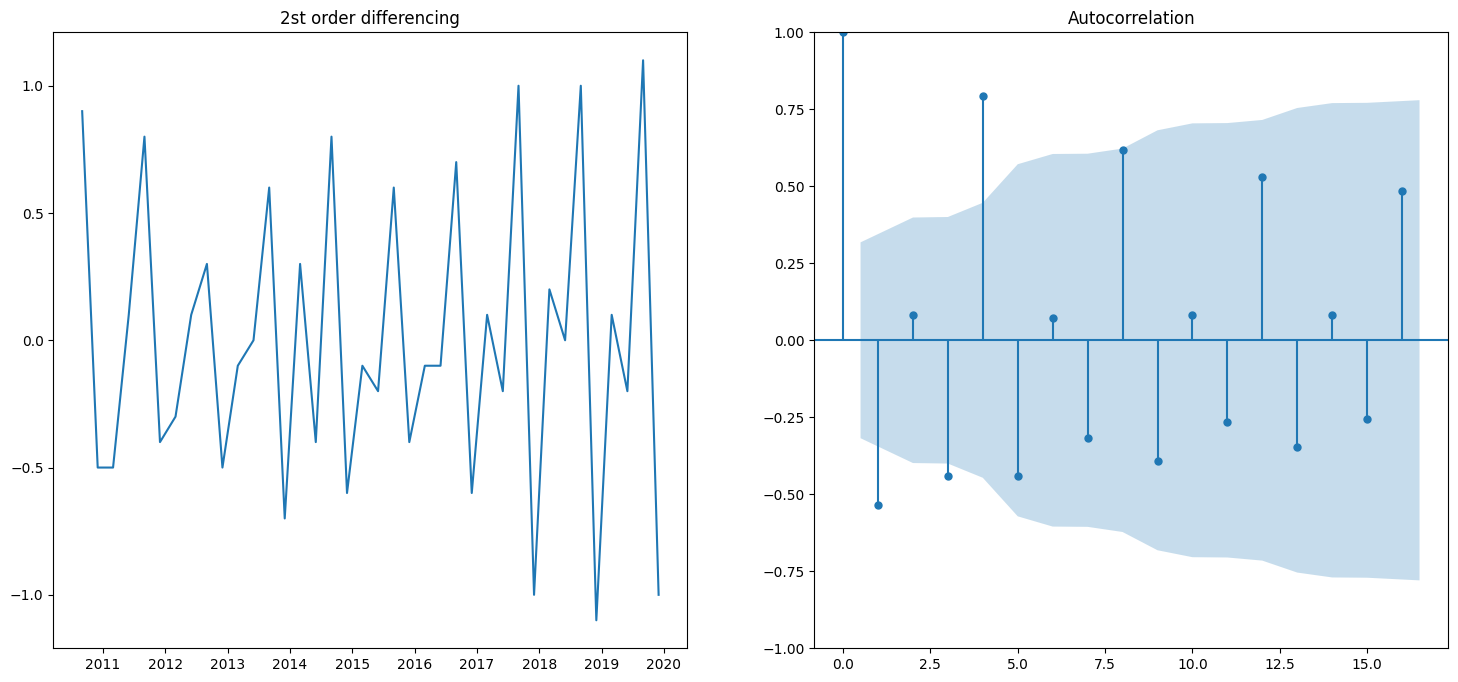

In [30]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2st order differencing')
ax1.plot(wages_pre_covid_qld)

ax2 = f.add_subplot(122)
plot_acf(wages_pre_covid_qld, ax=ax2)
plt.show()

As from the above observation, after the 3 order differencing, the p-value drops beyond the threshold order and shows strong evidence against the null hypothesis, sp taking "d" as 2. 

We see the 4th lag is the most significant. so p is 4.

There are 3 lags crossed the threshold, so q is 3.


In [31]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
                
for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_qld,
                                            order=(4, 2, 3),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results  = mod.fit()
        print('ARIMA(4, 2, 3)x{}12 - AIC:{}'.format(param_seasonal, results.aic))
    except:
        continue

E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3)x(0, 0, 0, 12)12 - AIC:2.1924020302976555
ARIMA(4, 2, 3)x(0, 0, 1, 12)12 - AIC:-1.5302610013711693
ARIMA(4, 2, 3)x(0, 1, 0, 12)12 - AIC:16.632781496562846


E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(4, 2, 3)x(0, 1, 1, 12)12 - AIC:10.920783413974828
ARIMA(4, 2, 3)x(1, 0, 0, 12)12 - AIC:4.395578044398581


E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 3)x(1, 0, 1, 12)12 - AIC:8.61139561051227


E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(4, 2, 3)x(1, 1, 0, 12)12 - AIC:13.474830379143526
ARIMA(4, 2, 3)x(1, 1, 1, 12)12 - AIC:19.44323991619886


E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
#(p, d, q)

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_qld,
                                order=(4, 2, 3),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1845      3.999     -0.046      0.963      -8.023       7.654
ar.L2         -0.1800      3.918     -0.046      0.963      -7.860       7.500
ar.L3         -0.1642      3.847     -0.043      0.966      -7.703       7.375
ar.L4          0.7683      3.778      0.203      0.839      -6.636       8.172
ma.L1         -2.5848      2.973     -0.869      0.385      -8.412       3.242
ma.L2          2.1693      4.063      0.534      0.593      -5.794      10.133
ma.L3         -0.5823      1.201     -0.485      0.628      -2.937       1.772
sigma2         0.0301      0.202      0.149      0.881      -0.365       0.425


E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


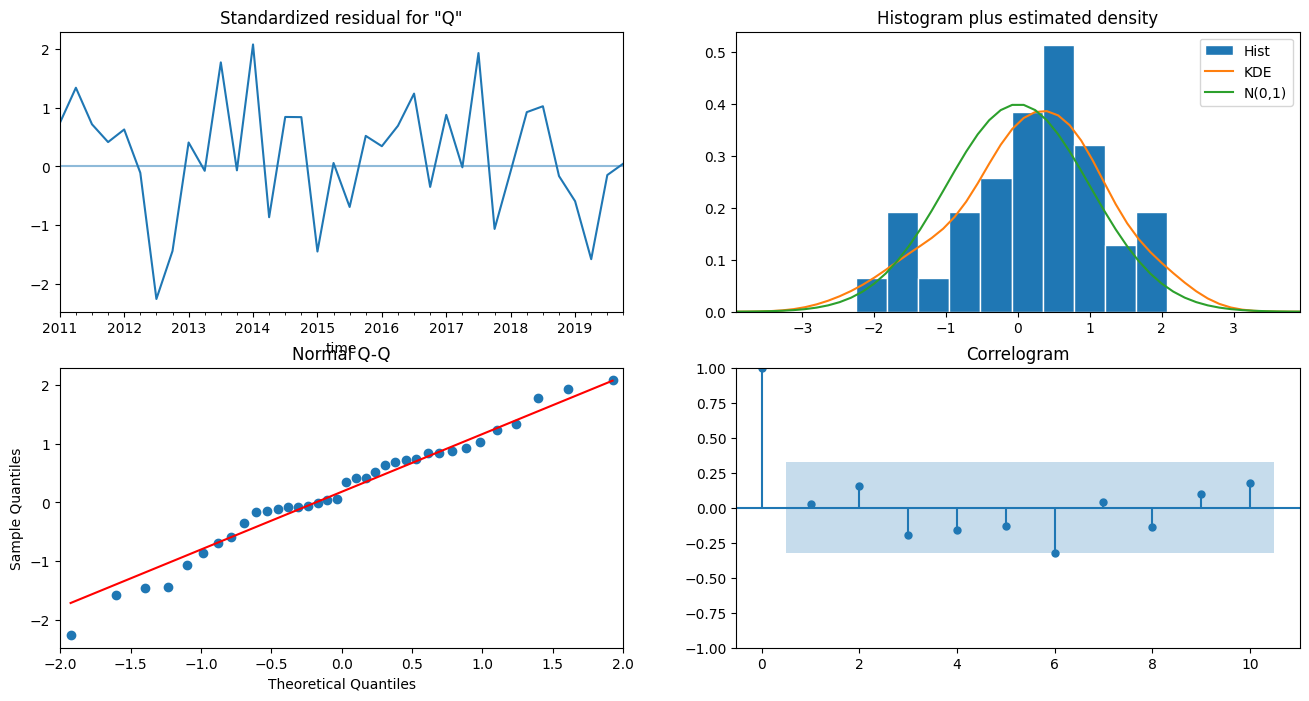

In [33]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

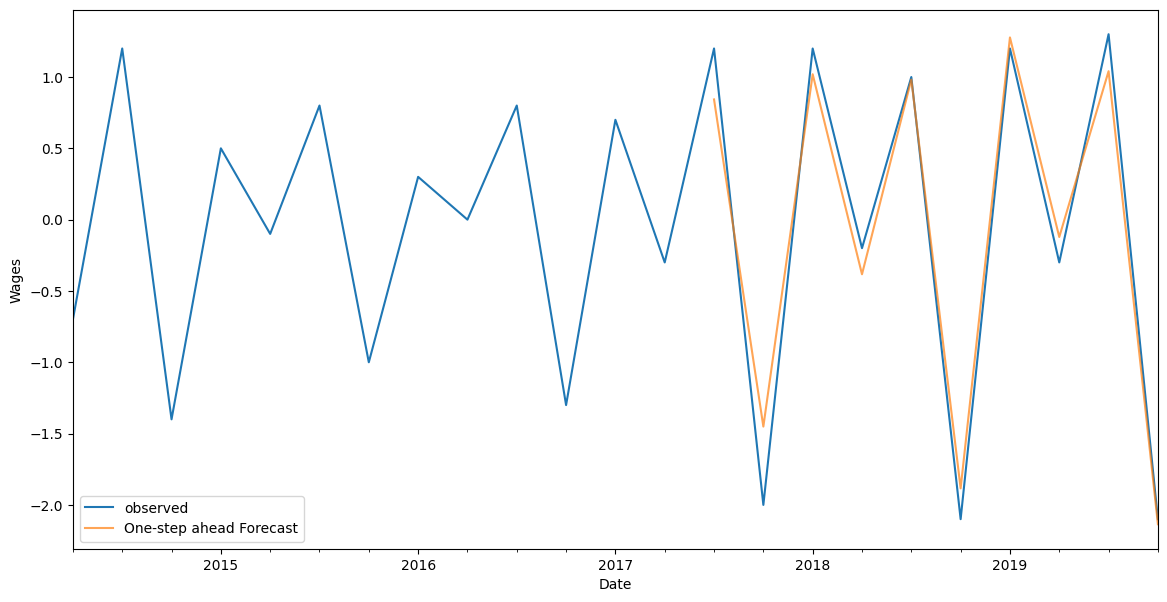

In [34]:
pred = results.get_prediction(start=pd.to_datetime('2017-06-01'), dynamic=False)
pred_ci = pred.conf_int().diff().dropna()
ax = wages_pre_covid_qld['2014':].diff().dropna().plot(label='observed')

pred.predicted_mean.diff().dropna().plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Wages')
plt.legend()
plt.show()

E:\Uni\research\venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\Uni\research\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7947      0.211     -3.771      0.000      -1.208      -0.382
ar.L2         -0.7736      0.213     -3.631      0.000      -1.191      -0.356
ar.L3         -0.7505      0.206     -3.638      0.000      -1.155      -0.346
ar.L4          0.1975      0.195      1.010      0.312      -0.186       0.581
ma.L1         -0.9457      0.162     -5.820      0.000      -1.264      -0.627
sigma2         0.0295      0.009      3.317      0.001       0.012       0.047
            lower QLD  upper QLD  Predictions
2020-03-01   0.159412   0.833122     0.496267
2020-06-01  -0.037099   0.659202     0.311052
2020-09-01   0.983337   1.685102     1.334220
2020-12-01   0.024588   0.730264     0.377426
2021-03-01  -0.009244   0.983170     0.486963
2021-06-01  -0.189637   0.826356     0.318360
2021-09-01   0.757246   1.783677     1.270461


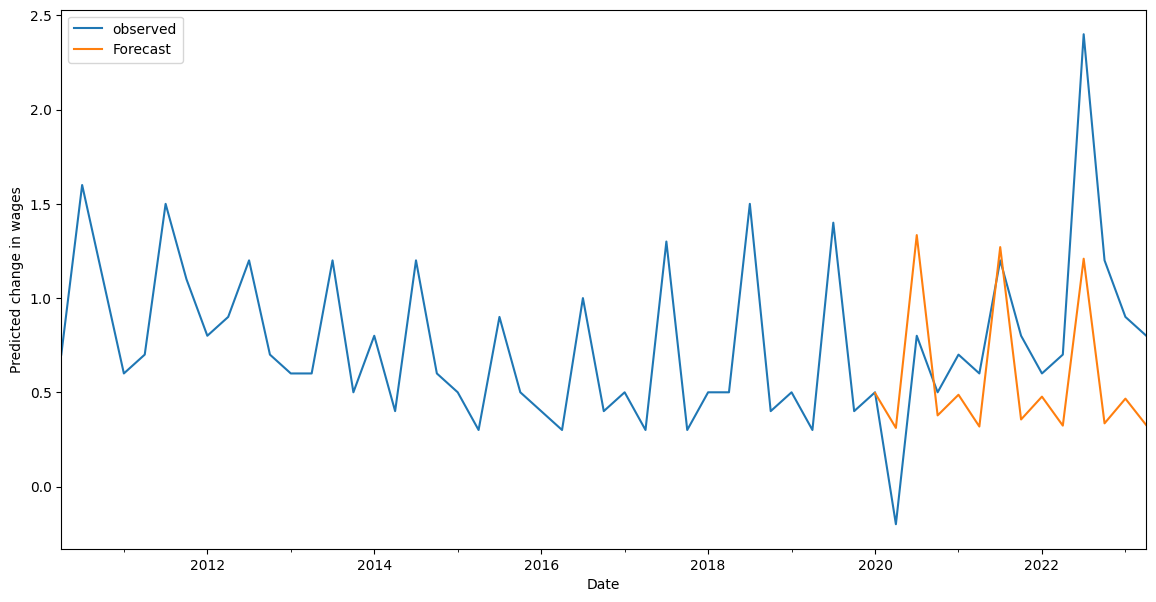

In [35]:
wages_pre_covid_qld = wages_pre_covid['QLD']
wages_pre_covid_qld = wages_pre_covid_qld.diff().dropna()

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_qld,
                                order=(4, 2, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_qld.diff().dropna().plot(label='observed', figsize=(14, 7))

pred_ci["Predictions"] = pred_uc.predicted_mean
print(pred_ci)

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted change in wages')
plt.legend()
plt.show()

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4770      0.529     -0.901      0.368      -1.514       0.560
ar.L2         -0.4630      0.524     -0.884      0.377      -1.490       0.564
ar.L3         -0.4471      0.522     -0.857      0.392      -1.470       0.576
ar.L4          0.4969      0.504      0.986      0.324      -0.490       1.484
ma.L1         -0.2968      0.560     -0.530      0.596      -1.394       0.801
sigma2         0.0282      0.008      3.571      0.000       0.013       0.044
             lower QLD   upper QLD  Predictions_wage
2020-03-01  132.371266  133.029546        132.700406
2020-06-01  132.503965  133.545518        133.024742
2020-09-01  133.693863  135.066623        134.380243
2020-12-01  133.948261  135.619003        134.783632
2021-03-01  134.133031  136.451661        135.292346
2021-06-01  134.185815  137.100460        135.6431

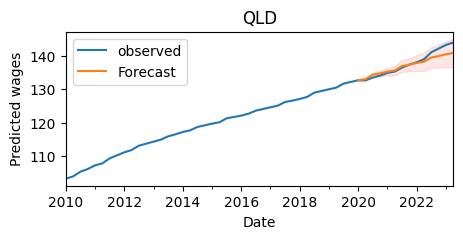

In [38]:
wages_pre_covid_qld = wages_pre_covid['QLD']

mod = sm.tsa.statespace.SARIMAX(wages_pre_covid_qld,
                                order=(4, 2, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = wages_nsw.plot(label='observed', figsize=(5, 2))
ax.fill_between(
    pred_ci.index, pred_ci['lower QLD'], pred_ci['upper QLD'],
    color='r', alpha=0.1
)
pred_ci["Predictions_wage"] = pred_uc.predicted_mean
print(pred_ci)

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Predicted wages')
plt.legend()
plt.title('QLD')

plt.savefig('QLD predicted PWI.png')

plt.show()